# Task 01 : Raw voice signal power noise cancellation

## Play and display "Raw EGG signal"

In [75]:
import IPython

IPython.display.Audio("4-phrase-egg.wav")

Text(0.5, 1.0, 'signal')

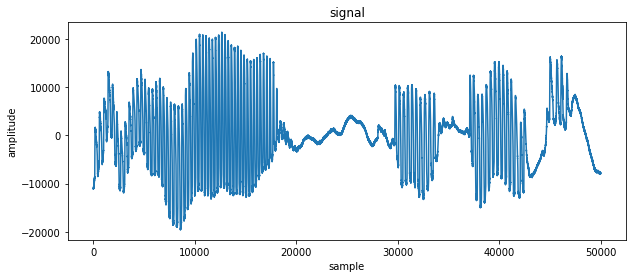

In [76]:
#amp, fs, n ,t = readAudio('./data/male_healthy/1032-a_n.wav')
amp, fs, n ,t = readAudio('4-phrase-egg.wav')


fig = plt.figure(figsize=(10,4))

plt.plot(amp)
plt.ylabel('amplitude')
plt.xlabel('sample')
plt.title('signal')

## Trying to use built-in libraries "Spectral Gating"
Link : https://github.com/timsainb/noisereduce#:~:text=Noisereduce%20is%20a%20noise%20reduction,a%20form%20of%20Noise%20Gate.

In [65]:
import noisereduce as nr
# load data
rate, data = wavfile.read("4-phrase-egg.wav")
# perform noise reduction
reduced_noise = nr.reduce_noise(y=data, sr=rate)

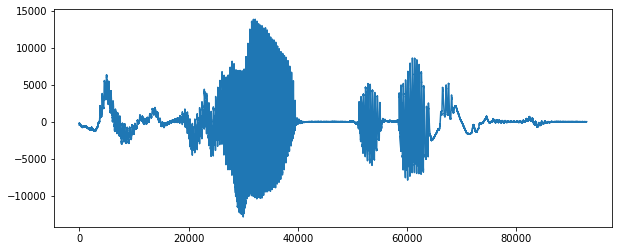

In [62]:
fig = plt.figure(figsize=(10,4))

plt.plot(reduced_noise)

In [77]:
from scipy.io.wavfile import write
samplerate = 50000; fs = 100 # we use 50000 rahter 44100, becasue we of sample rate of svd dataset
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
write("Filtered_NoiseReduced.wav", samplerate, y2.astype(np.int16))

## play the filtered EGG signal (by hearing, it seems very clean with no noise)

In [80]:
import IPython

IPython.display.Audio("Filtered_NoiseReduced.wav")

# Raw voice signal noise cancellation design our own filter

In [81]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from math import pi

In [82]:
sampling_freq = 1600

In [83]:
duration = 1.5

In [84]:
t = np.arange(0.0, duration, 1/sampling_freq)
y_clean = np.sin(2*pi*10*t) + 0.5 * np.sin(2*pi*25*t)

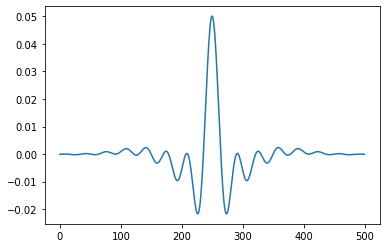

In [85]:
filter = signal.firwin(500, [0.01, 0.06], pass_zero=False)
plt.plot(filter)
plt.show()

In [86]:
y2 = signal.convolve(amp, filter, mode='same')

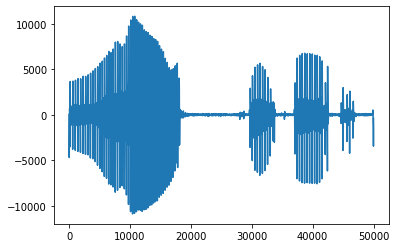

In [87]:
plt.plot(y2)
plt.show()

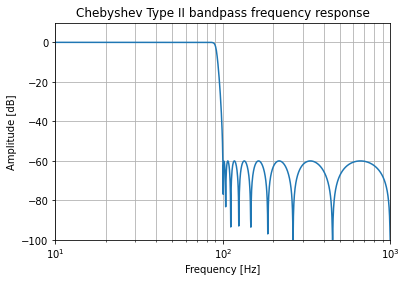

In [88]:
## Design IIR filter
sos2 = signal.iirfilter(17, [0.5, 200], rs=60, btype='bandpass',
                        analog=False, ftype='cheby2', fs=4000,
                        output='sos')
w, h = signal.sosfreqz(sos2, 2000, fs=2000)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.semilogx(w, 20 * np.log10(np.maximum(abs(h), 1e-5)))
ax.set_title('Chebyshev Type II bandpass frequency response')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('Amplitude [dB]')
ax.axis((10, 1000, -100, 10))
ax.grid(which='both', axis='both')
plt.show()

In [90]:
## filter out 50 Hz noise
CleanSignal = signal.sosfilt(sos2, amp)

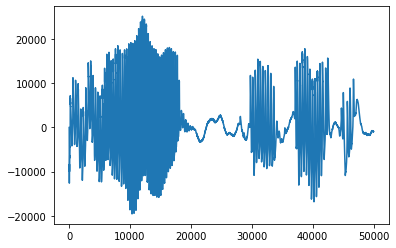

In [91]:
plt.plot(CleanSignal)
plt.show()

In [92]:
from scipy.io.wavfile import write
samplerate = 50000; fs = 100 # we use 50000 rahter 44100, becasue we of sample rate of svd dataset
t = np.linspace(0., 1., samplerate)
amplitude = np.iinfo(np.int16).max
write("Filtered_ChebbyChev.wav", samplerate, y2.astype(np.int16))

In [93]:
import IPython

IPython.display.Audio("Filtered_ChebbyChev.wav")

# Conclusion
## We have removed noise using three methods
## 1 ) built-in library  (best)
## 2)  using FIR filter (poor)
## 3)  IIR filter using chebychev (good)

# Task 2: Check power noise and frequency band (Hint: Check through delay)

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# if we know the noise distribution , we can find using "gaussian noise" esitmation method
#Ehow ever as we are not certain about the noise distribution , it lies in complex noise categorie

# Part A) Processing for Power of noise

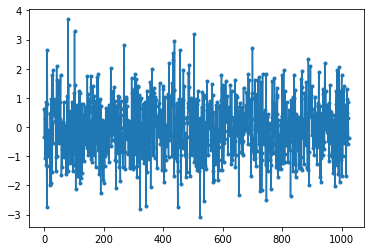

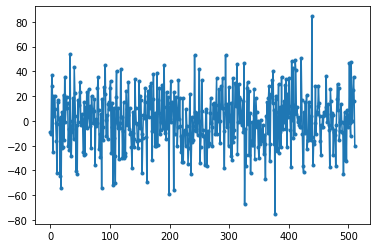

In [126]:
import numpy as np
import matplotlib.pyplot as plt

N = 1024 # number of samples to simulate, choose any number you want
x = np.random.randn(N)
plt.plot(x, '.-')
plt.show()

X = np.fft.fftshift(np.fft.fft(x))
X = X[N//2:] # only look at positive frequencies.  remember // is just an integer divide
plt.plot(np.real(X), '.-')
plt.show()

In [129]:
n = np.random.randn() + 1j * np.random.randn()

In [130]:
power = np.var(x)

In [131]:
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2) # AWGN with unity power

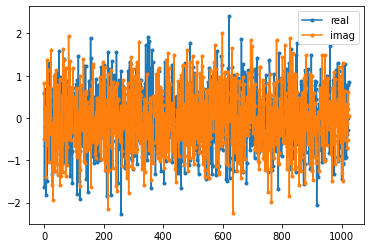

In [132]:
n = (np.random.randn(N) + 1j*np.random.randn(N))/np.sqrt(2)
plt.plot(np.real(n),'.-')
plt.plot(np.imag(n),'.-')
plt.legend(['real','imag'])
plt.show()

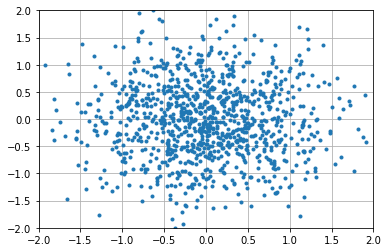

In [133]:
plt.plot(np.real(n),np.imag(n),'.')
plt.grid(True, which='both')
plt.axis([-2, 2, -2, 2])
plt.show()

## Conclusion, we can find noise  power after estimation in differnte  quadrants

# Part B) find Frequency band 

In [144]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
%matplotlib inline

In [145]:
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (9, 7)

In [146]:
sampFreq, sound = wavfile.read('4-phrase-egg.wav')

In [147]:
sound.dtype, sampFreq

(dtype('int16'), 50000)

In [148]:
sound = sound / 2.0**15

In [149]:
sound.shape

(92854,)

In [142]:
length_in_s = sound.shape[0] / sampFreq
print(length_in_s)

1.85708


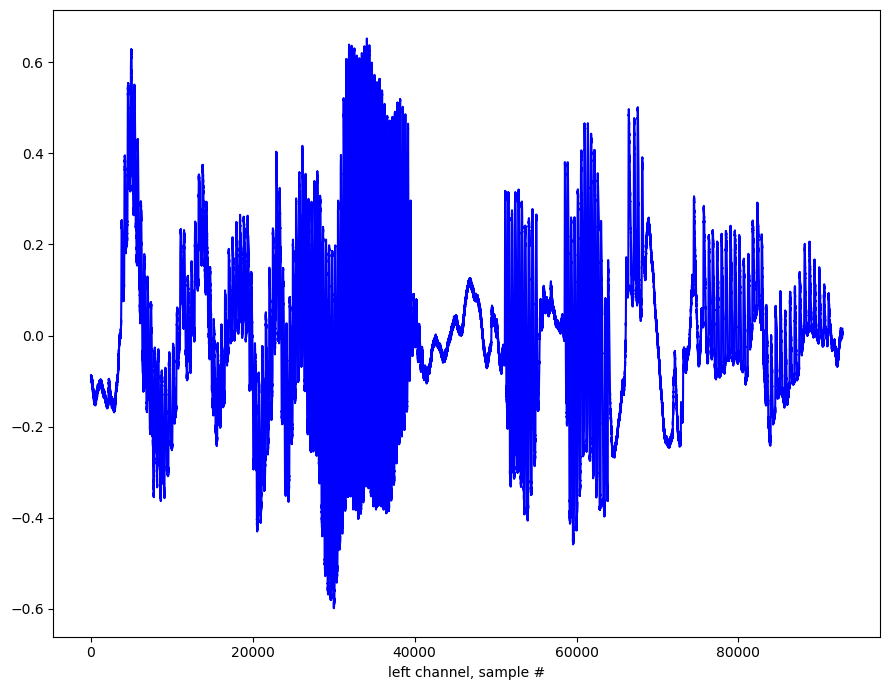

In [152]:
plt.plot(sound, 'b')
plt.xlabel("left channel, sample #")
plt.tight_layout()
plt.show()

In [153]:
time = np.arange(sound.shape[0]) / sound.shape[0] * length_in_s

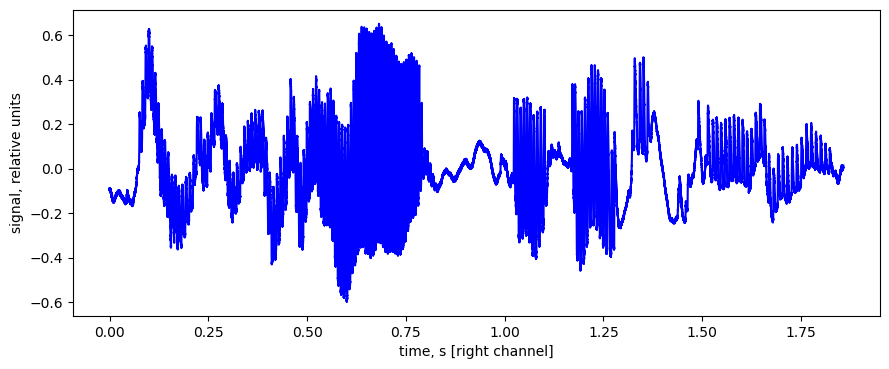

In [156]:
plt.subplot(2,1,1)
plt.plot(time, sound, 'b')
plt.xlabel("time, s [right channel]")
plt.ylabel("signal, relative units")
plt.tight_layout()
plt.show()

In [160]:
signal= sound;

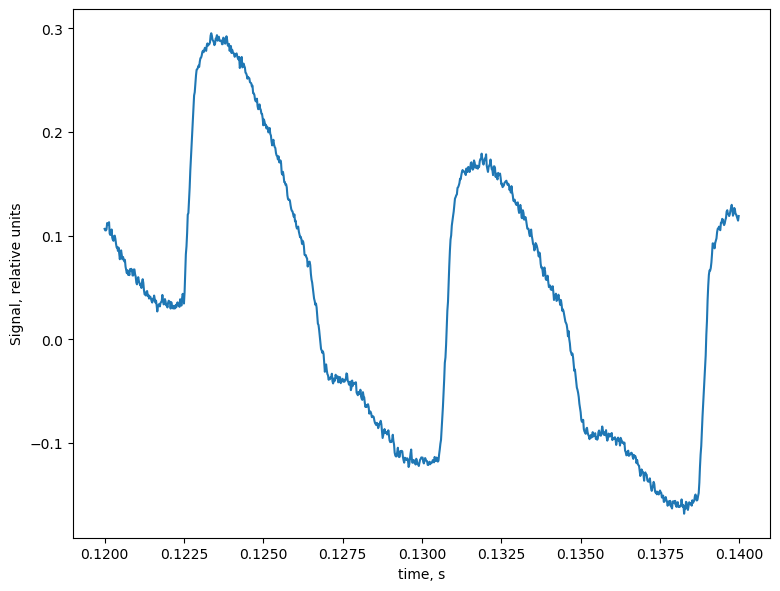

In [161]:
plt.plot(time[6000:7000], signal[6000:7000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

In [162]:
fft_spectrum = np.fft.rfft(signal)
freq = np.fft.rfftfreq(signal.size, d=1./sampFreq)

In [163]:
fft_spectrum

array([ 16.39633179+0.00000000e+00j,  47.47030513+5.43168556e+01j,
       192.34519348+2.95858478e+00j, ...,  -0.29762743+1.72403174e-01j,
         0.2378422 +2.92323265e-02j,  -0.41384888+0.00000000e+00j])

In [165]:
fft_spectrum_abs = np.abs(fft_spectrum)

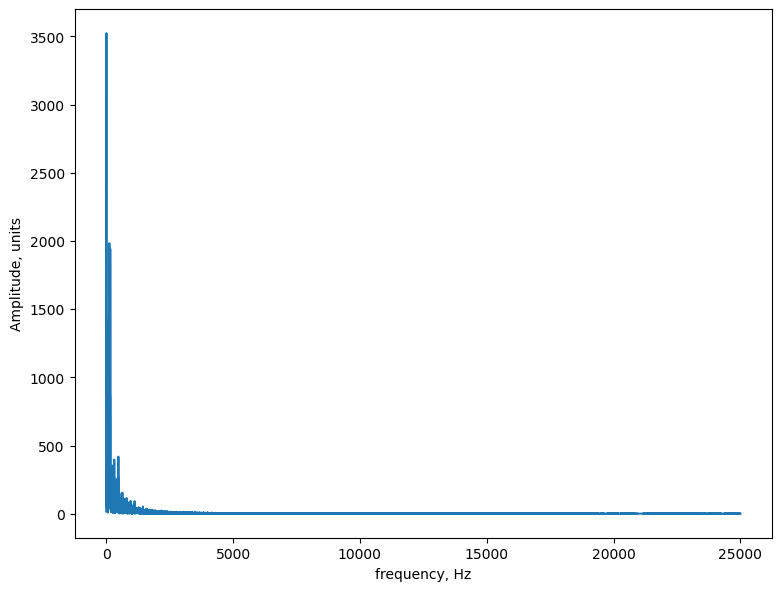

In [166]:
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

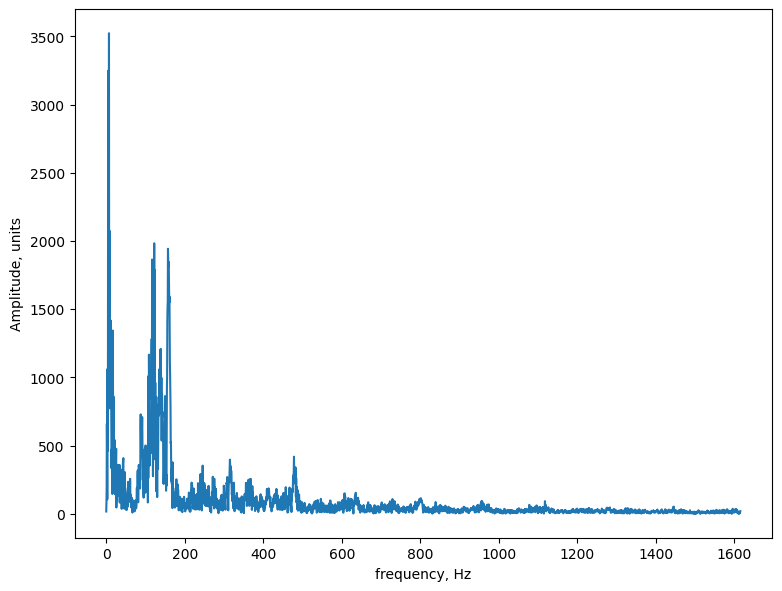

In [167]:
plt.plot(freq[:3000], fft_spectrum_abs[:3000])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

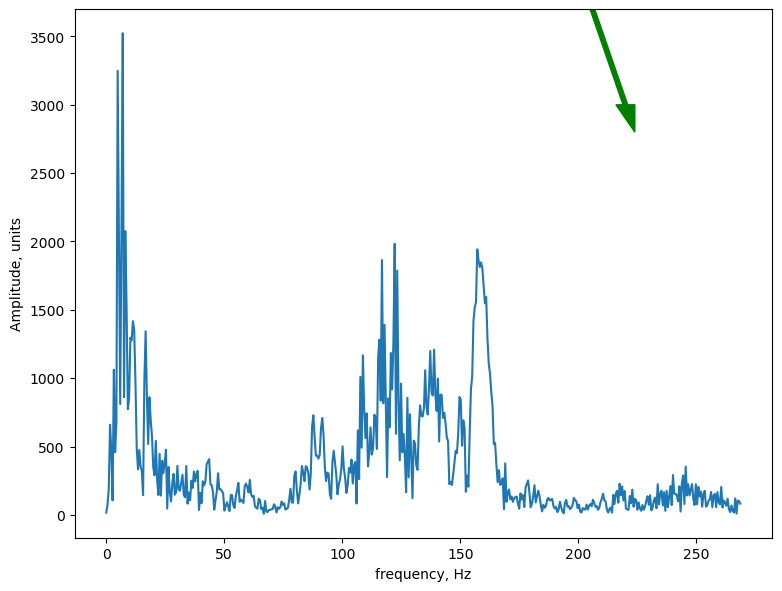

In [170]:
plt.plot(freq[:500], fft_spectrum_abs[:500])
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.arrow(150, 5500, -20, 1000, width=2, head_width=8, head_length=200, fc='k', ec='k')
plt.arrow(200, 4000, 20, -1000, width=2, head_width=8, head_length=200, fc='g', ec='g')
plt.show()

In [171]:
for i,f in enumerate(fft_spectrum_abs):
    if f > 350: #looking at amplitudes of the spikes higher than 350 
        print('frequency = {} Hz with amplitude {} '.format(np.round(freq[i],1),  np.round(f)))

frequency = 1.6 Hz with amplitude 660.0 
frequency = 2.2 Hz with amplitude 472.0 
frequency = 3.2 Hz with amplitude 1061.0 
frequency = 3.8 Hz with amplitude 459.0 
frequency = 4.3 Hz with amplitude 673.0 
frequency = 4.8 Hz with amplitude 3248.0 
frequency = 5.4 Hz with amplitude 1980.0 
frequency = 5.9 Hz with amplitude 810.0 
frequency = 6.5 Hz with amplitude 2102.0 
frequency = 7.0 Hz with amplitude 3523.0 
frequency = 7.5 Hz with amplitude 861.0 
frequency = 8.1 Hz with amplitude 2076.0 
frequency = 8.6 Hz with amplitude 1531.0 
frequency = 9.2 Hz with amplitude 773.0 
frequency = 9.7 Hz with amplitude 851.0 
frequency = 10.2 Hz with amplitude 1296.0 
frequency = 10.8 Hz with amplitude 1277.0 
frequency = 11.3 Hz with amplitude 1417.0 
frequency = 11.8 Hz with amplitude 1356.0 
frequency = 12.4 Hz with amplitude 970.0 
frequency = 12.9 Hz with amplitude 487.0 
frequency = 14.0 Hz with amplitude 475.0 
frequency = 14.5 Hz with amplitude 357.0 
frequency = 16.2 Hz with amplitude 981

# 3. Apply the most appropriate filter (Hint: Remove loop voltage)

# Moving Average Filter 

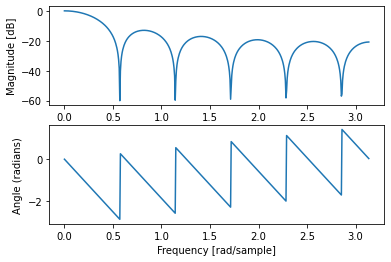

In [108]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

L=11 #L-point filter
b = (np.ones(L))/L #numerator co-effs of filter transfer function
a = np.ones(1)  #denominator co-effs of filter transfer function

w, h = signal.freqz(b,a)
plt.subplot(2, 1, 1)
plt.plot(w, 20 * np.log10(abs(h)))
plt.ylabel('Magnitude [dB]')
plt.xlabel('Frequency [rad/sample]')

plt.subplot(2, 1, 2)
angles = np.unwrap(np.angle(h))
plt.plot(w, angles)
plt.ylabel('Angle (radians)')
plt.xlabel('Frequency [rad/sample]')
plt.show()

In [112]:
import scipy.io.wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt

# read EGG data from the WAV file
sampleRate, data = scipy.io.wavfile.read('4-phrase-egg.wav')
times = np.arange(len(data))/sampleRate

# apply a 3-pole lowpass filter at 0.1x Nyquist frequency
b, a = scipy.signal.butter(3, 0.1)
filtered = scipy.signal.filtfilt(b, a, data)

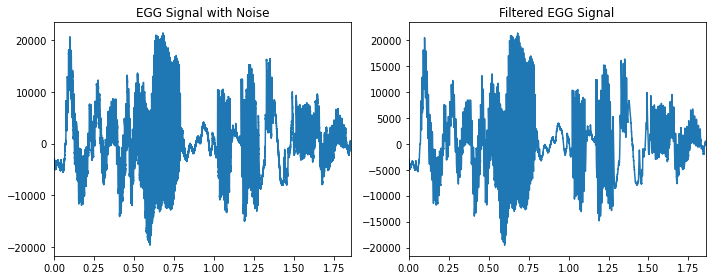

In [113]:
# plot the original data next to the filtered data

plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(times, data)
plt.title("EGG Signal with Noise")
plt.margins(0, .05)

plt.subplot(122)
plt.plot(times, filtered)
plt.title("Filtered EGG Signal")
plt.margins(0, .05)

plt.tight_layout()
plt.show()

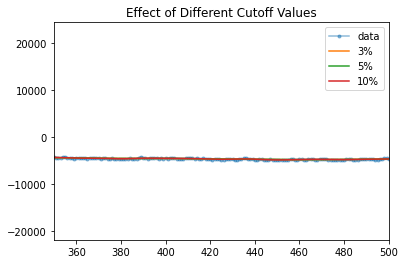

In [114]:
plt.plot(data, '.-', alpha=.5, label="data")

for cutoff in [.03, .05, .1]:
    b, a = scipy.signal.butter(3, cutoff)
    filtered = scipy.signal.filtfilt(b, a, data)
    label = f"{int(cutoff*100):d}%"
    plt.plot(filtered, label=label)

plt.legend()
plt.axis([350, 500, None, None])
plt.title("Effect of Different Cutoff Values")
plt.show()

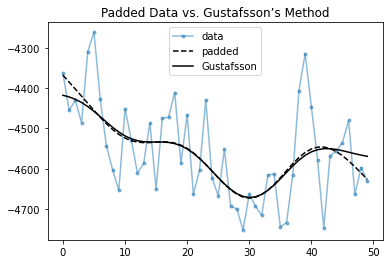

In [115]:
# A small portion of data will be inspected for demonstration
segment = data[350:400]

filtered = scipy.signal.filtfilt(b, a, segment)
filteredGust = scipy.signal.filtfilt(b, a, segment, method="gust")

plt.plot(segment, '.-', alpha=.5, label="data")
plt.plot(filtered, 'k--', label="padded")
plt.plot(filteredGust, 'k', label="Gustafsson")
plt.legend()
plt.title("Padded Data vs. Gustafsson’s Method")
plt.show()

In [116]:
b, a = scipy.signal.butter(3, 0.05, 'lowpass')
filteredLowPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, 0.05, 'highpass')
filteredHighPass = scipy.signal.filtfilt(b, a, data)

b, a = scipy.signal.butter(3, [.01, .05], 'band')
filteredBandPass = scipy.signal.lfilter(b, a, data)

Text(0.5, 1.0, 'Band Pass Filter')

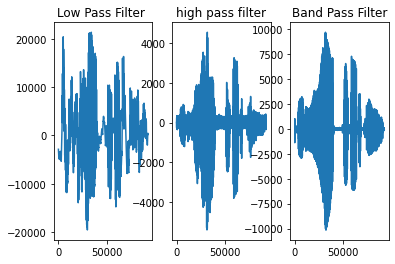

In [117]:
plt.subplot(131)
plt.plot(filteredLowPass)
plt.title("Low Pass Filter ")

plt.subplot(132)
plt.plot(filteredHighPass)
plt.title("high pass filter")

plt.subplot(133)
plt.plot(filteredBandPass)
plt.title("Band Pass Filter")

# hanning window

In [118]:
# create a normalized Hanning window
windowSize = 40
window = np.hanning(windowSize)
window = window / window.sum()

# filter the data using convolution
filtered = np.convolve(window, data, mode='valid')

Text(0.5, 1.0, 'Filtered')

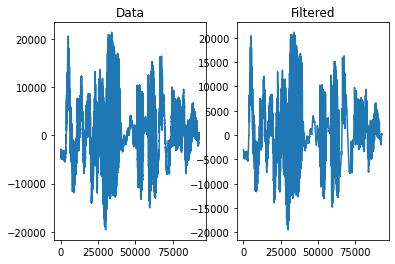

In [119]:
plt.subplot(121)
plt.plot(data)
plt.title("Data")

plt.subplot(122)
plt.plot(filtered)
plt.title("Filtered")